In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('housing.csv')

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
pd.get_dummies(data.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [12]:
data = data.join(pd.get_dummies(data.ocean_proximity).astype(int))
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [13]:
data.drop(columns = ['ocean_proximity'], inplace=True)

In [14]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

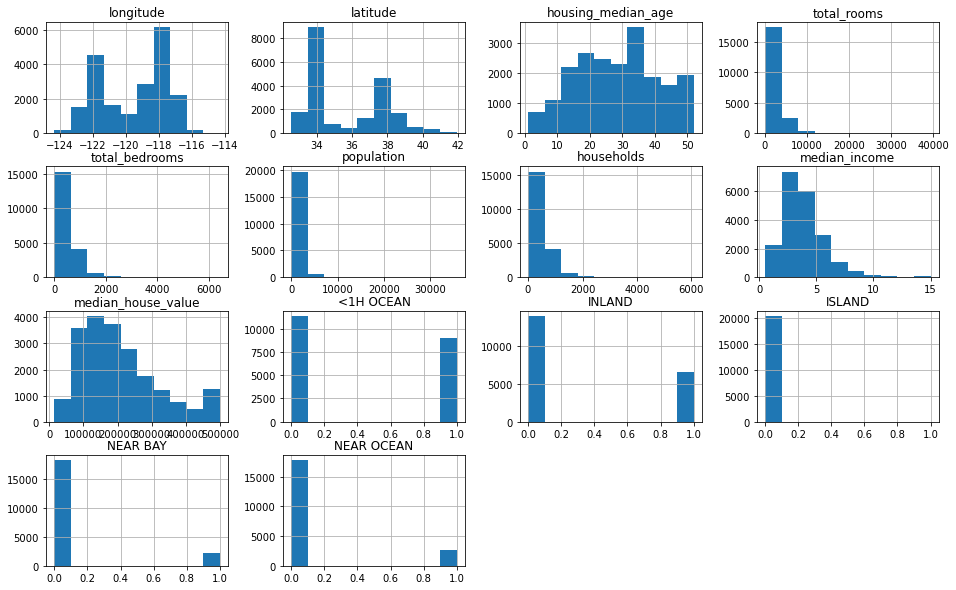

In [15]:
data.hist(figsize=(16,10))

In [16]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<AxesSubplot:>

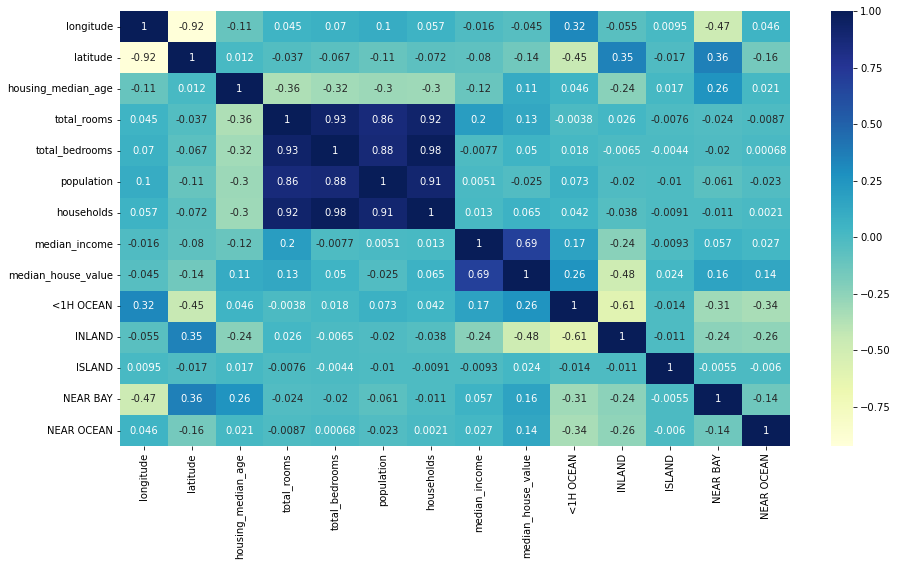

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [19]:
data['total_rooms'] = np.log(data['total_rooms']  + 1) 
data['total_bedrooms'] = np.log(data['total_bedrooms']  + 1)
data['population'] = np.log(data['population']  + 1)
data['households'] = np.log(data['households']  + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

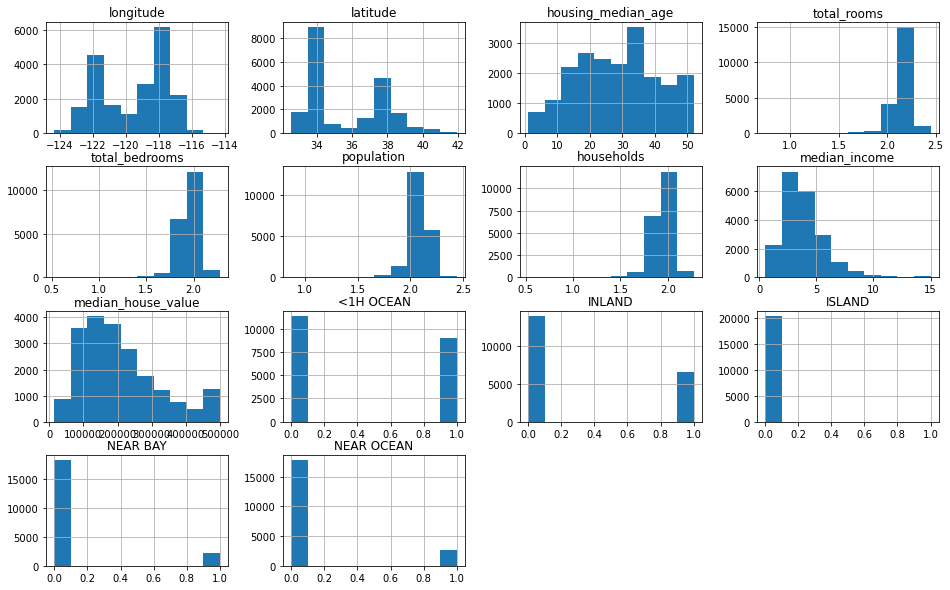

In [20]:
data.hist(figsize=(16,10))

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

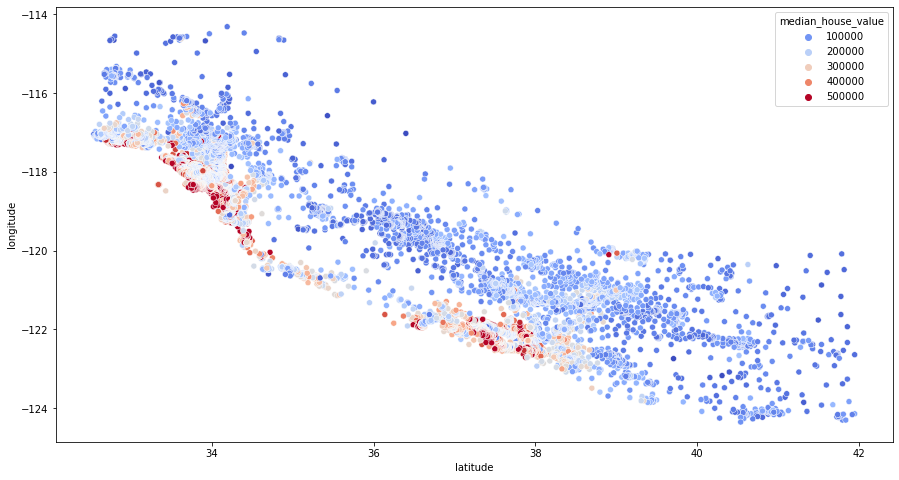

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue = 'median_house_value', palette = 'coolwarm')

In [22]:
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

<AxesSubplot:>

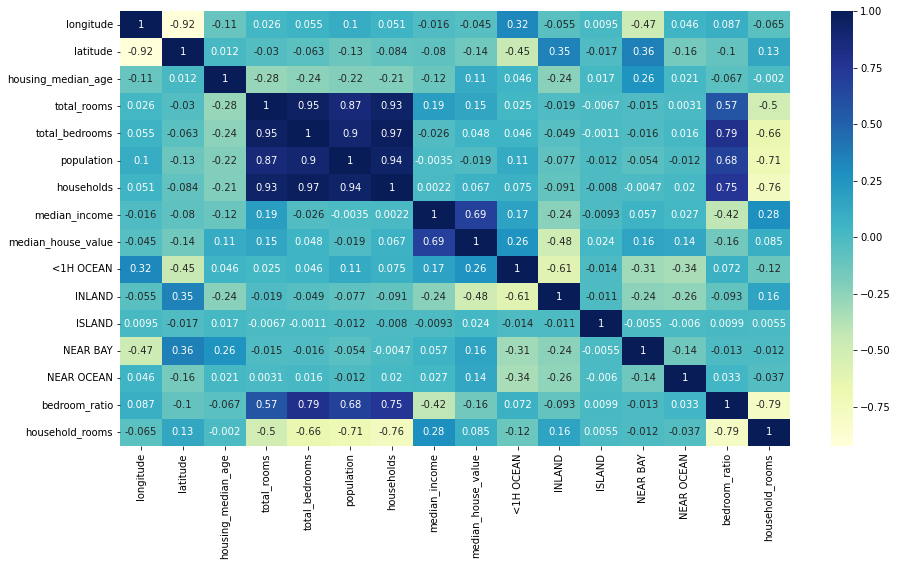

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap ="YlGnBu")


In [25]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,2.051692,1.769435,1.913631,1.765448,8.3252,452600.0,0,0,0,1,0,0.862427,1.162137
1,-122.22,37.86,21.0,2.289282,2.080617,2.172938,2.084169,8.3014,358500.0,0,0,0,1,0,0.908851,1.098415
2,-122.24,37.85,52.0,2.115250,1.832945,1.975273,1.821607,7.2574,352100.0,0,0,0,1,0,0.866538,1.161200
3,-122.25,37.85,52.0,2.098104,1.866222,1.991450,1.855302,5.6431,341300.0,0,0,0,1,0,0.889480,1.130869
4,-122.25,37.85,52.0,2.127649,1.892864,1.993147,1.881095,3.8462,342200.0,0,0,0,1,0,0.889651,1.131070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,1.935416,2.046469,1.917234,1.5603,78100.0,0,1,0,0,0,0.908478,1.111181
20636,-121.21,39.49,18.0,2.021312,1.794635,1.928289,1.748318,2.5568,77100.0,0,1,0,0,0,0.887857,1.156146
20637,-121.22,39.43,17.0,2.165723,1.972164,2.068851,1.956291,1.7000,92300.0,0,1,0,0,0,0.910626,1.107056
20638,-121.32,39.43,18.0,2.143457,1.948216,2.029378,1.925406,1.8672,84700.0,0,1,0,0,0,0.908913,1.113249


In [26]:
from sklearn.model_selection import train_test_split
X= data.drop(['median_house_value'], axis =1)
y = data['median_house_value']

X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [27]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,2.051692,1.769435,1.913631,1.765448,8.3252,0,0,0,1,0,0.862427,1.162137
1,-122.22,37.86,21.0,2.289282,2.080617,2.172938,2.084169,8.3014,0,0,0,1,0,0.908851,1.098415
2,-122.24,37.85,52.0,2.115250,1.832945,1.975273,1.821607,7.2574,0,0,0,1,0,0.866538,1.161200
3,-122.25,37.85,52.0,2.098104,1.866222,1.991450,1.855302,5.6431,0,0,0,1,0,0.889480,1.130869
4,-122.25,37.85,52.0,2.127649,1.892864,1.993147,1.881095,3.8462,0,0,0,1,0,0.889651,1.131070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,1.935416,2.046469,1.917234,1.5603,0,1,0,0,0,0.908478,1.111181
20636,-121.21,39.49,18.0,2.021312,1.794635,1.928289,1.748318,2.5568,0,1,0,0,0,0.887857,1.156146
20637,-121.22,39.43,17.0,2.165723,1.972164,2.068851,1.956291,1.7000,0,1,0,0,0,0.910626,1.107056
20638,-121.32,39.43,18.0,2.143457,1.948216,2.029378,1.925406,1.8672,0,1,0,0,0,0.908913,1.113249


In [29]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
reg.score(X_test, y_test)

0.6622605944604757

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test,y_test)

0.8056537282716246

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)      

DecisionTreeClassifier()

In [34]:
model.score(X_test,y_test)

0.025691216050893077

In [35]:
predictions = forest.predict([[-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,1,0,0,0,0.717813,1.399834]])
predictions

C:\Users\SHIVAM PAWAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([394974.15])

In [36]:
import joblib
joblib.dump(forest, 'House-Price-Predictor.joblib')

['House-Price-Predictor.joblib']

In [37]:
forest = joblib.load('House-Price-Predictor.joblib')
predictions = forest.predict([[-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,1,0,0,0,0.717813,1.399834]]) #ask it to predict
predictions

C:\Users\SHIVAM PAWAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([394974.15])